In [3]:
import pandas as pd

from matplotlib import pyplot as  plt

import numpy as np

import os

In [4]:
def chatccb_data(mounts,years):
    output_df = pd.DataFrame()
    for mounth in mounts:
        for year in years:
            filepath = 'chatccb_{0}_{1}.xlsx'.format(mounth,year)
            if os.path.isfile(filepath):
                print(filepath)
                input_df = pd.ExcelFile(filepath).parse('sheet1')
                output_df = pd.concat([output_df,input_df],ignore_index=True)
    return output_df

In [5]:
mounts = ['ene','feb','mar']
years = ['2015','2016','2017']

### load_files.xlsx

In [6]:
dataframe = chatccb_data(mounts,years)

chatccb_ene_2017.xlsx
chatccb_feb_2017.xlsx
chatccb_mar_2017.xlsx


In [7]:
dataframe_chatccb = dataframe.copy()
dataframe_chatccb = dataframe_chatccb[['sub_label', 'sub']]
#dataframe_chatccb.drop(dataframe_chatccb.columns[0], axis=1, inplace=True)
dataframe_chatccb.dropna(subset=['sub_label'], inplace=True)
dataframe_chatccb['sub_label'] = dataframe_chatccb['sub_label'].apply(lambda text: str(text).lower().strip())
dataframe_chatccb['sub'] = dataframe_chatccb['sub'].apply(lambda text: str(text).lower().strip())
dataframe_chatccb = dataframe_chatccb[dataframe_chatccb.apply(lambda row: row['sub_label'] != '', axis=1)]
len(dataframe_chatccb)

2590

In [8]:
dataframe_chatccb['sub_label'].value_counts()

otros                                 555
rmmv                                  232
clave virtual                         226
rmm                                   156
agente                                131
rrup                                  104
disolucion                             96
plataforma                             75
certificados                           53
certificado                            53
inconveniente clave virtual            49
renovacion                             49
procedimiento                          45
costos                                 39
aumento capital                        37
problemas plataforma                   37
constitucion                           36
actualizacion                          35
rup                                    34
normas niif                            33
registro mercantil                     33
actualizar                             31
ilpv                                   30
reforma                           

In [9]:
dataframe_chatccb['sub'].value_counts()

nan                            1382
generacion                      183
procedimientos                  128
procedimiento                   123
                                 98
activos                          65
costos                           61
certificado                      43
ayuda                            36
estados financieros              36
requisitos                       28
beneficios                       26
asistencia                       26
agente                           25
acceso                           23
pago                             22
sas                              20
inconvenientes                   16
formulario                       15
establecimiento de comercio      15
orden de compra                  12
costo                            12
tramite                          12
cancelacion                      12
fechas                           11
correccion                       10
plazo                            10
plataforma                  

In [10]:
#dataframe_chatccb['sub_label'].unique().tolist()

In [11]:
#dataframe_chatccb['sub_label'].value_counts()

### creacion reeplazo de palabras 

In [12]:
dic_key = {
     'acceso':'otros',
     'beneficios':'otros',
     'costo':'costos',
     'estados financieros':'normas niif',
     'asistencia':'otros',
     'ayuda':'otros',
     'pago':'pagos',
     'tarifas':'costos',
     'error':'otros',
     'activos':'costos',
     'ordenes de pago':'orden de compra',   
     'orden de pago':'orden de compra',
     'actualizar':'actualizacion',
     'agente':'otros',
     'aumento capital':'aumento de capital',
     'base de datos':'otros',
     'cambio':'otros',
     'cancelacion':'otros',
     'certificado':'certificados',
     'cesion de acciones':'otros',
     'cesion de establecimiento':'otros',
     'cesion establecimiento de comercio':'otros',
     'ciiu':'actualizacion',
     'ciuu':'actualizacion',
     'circulo afiliados':'otros',
     'clave virtual':'generar clave virtual',
     'constitucion':'otros',
     'constitucion sas':'otros',
     'copia documentos':'otros',
     'correcion':'correccion',
     'creacion empresa':'otros',
     'devolucion dinero':'otros',
     'disminucion capital':'otros',
     'eventos':'otros',
     'firma digital':'otros',
     'formularios':'otros',
     'formulario':'otros',
     'ilpc':'otros',
     'ilpp':'otros',
     'ilpv':'otros',
     'ilpv sas':'otros',
     'informacion':'procedimiento',
     'matricula mercantil':'otros',
     'mutacion':'otros',
     'niif':'normas niif',
     'nombramiento':'actualizacion',
     'plataforma':'problemas plataforma',
     'plazo':'plazos',
     'procedimientos':'procedimiento',
     'puntos atencion':'otros',
     'puntos de atencion':'otros',
     'r rup':'otros',
     'reactivacion empresa':'otros',
     'reforma':'otros',
     'registro mercantil':'otros',
     'registro rup':'otros',
     'renovacion mercantil':'otros',
     'renovacion rup':'otros',
     'rnt':'otros',
     'rruneol':'otros',
     'rrup':'otros',
     'rrupf':'otros',
     'rrupv':'otros',
     'rup':'otros',
     'rup renovacion':'otros',
     'renovacion rup':'otros',
     'rut':'otros',
     'sancion':'otros',
     'traslado domicio':'otros',
     'requisitos':'procedimiento',
     'tramite':'procedimiento',
     'estados financieros':'costos',
     'estados financerios':'costos',
     'años anteriores':'años vencidos',
     'recibo pago':'otros',
     'tarifa': 'costos',
     'reliquidacion':'otros',
     'certificacion':'certificados',
     'fechas':'años vencidos'
}
dic_key_sub = [
    'renovacion v',
    'renovacion',
    'rmm',
    'rmmf',
    'rmmv'
]

In [13]:
dataframe_chatccb_test = dataframe_chatccb.copy()
dataframe_chatccb_test['sub_label'] = dataframe_chatccb_test['sub_label'].apply(lambda text : dic_key[text] if text in dic_key else text)
labeled = dataframe_chatccb_test.apply(lambda row: dic_key[row['sub']] if row['sub'] in dic_key else row['sub'] if row['sub_label'] in dic_key_sub else row['sub_label'], axis=1)
labeled.dropna(inplace=True)

In [14]:
labeled.value_counts() #.unique().tolist()

otros                          1093
generar clave virtual           243
procedimiento                   241
costos                          204
certificados                    148
problemas plataforma            121
disolucion                       93
actualizacion                    78
pagos                            55
normas niif                      53
años vencidos                    51
aumento de capital               51
inconveniente clave virtual      49
plazos                           36
orden de compra                  34
correccion                       20
nan                              15
modificacion                      5
dtype: int64

### remove_label_otro

In [15]:
dataframe_chatccb_size = labeled.groupby(labeled).size()
dataframe_chatccb_size.drop(['otros', 'nan'], inplace=True)
dataframe_chatccb_size_div = dataframe_chatccb_size.div(sum(dataframe_chatccb_size.values)/100).tolist()

In [16]:
dataframe_chatccb_size

actualizacion                   78
aumento de capital              51
años vencidos                   51
certificados                   148
correccion                      20
costos                         204
disolucion                      93
generar clave virtual          243
inconveniente clave virtual     49
modificacion                     5
normas niif                     53
orden de compra                 34
pagos                           55
plazos                          36
problemas plataforma           121
procedimiento                  241
dtype: int64

### promedio_otros_categoria

In [17]:
fracs = []
label_all = len(dataframe_chatccb_test)-len(dataframe_chatccb_test.loc[dataframe_chatccb_test['sub_label'] == 'otros'])
label_otros = len(dataframe.loc[dataframe['sub_label'] == 'otros'])
fracs.append(label_otros)
fracs.append(label_all)


In [18]:
labels = dataframe_chatccb_size.keys().tolist()
labels

['actualizacion',
 'aumento de capital',
 'años vencidos',
 'certificados',
 'correccion',
 'costos',
 'disolucion',
 'generar clave virtual',
 'inconveniente clave virtual',
 'modificacion',
 'normas niif',
 'orden de compra',
 'pagos',
 'plazos',
 'problemas plataforma',
 'procedimiento']

In [19]:
dataframe_chatccb_size_div

[5.263157894736842,
 3.4412955465587043,
 3.4412955465587043,
 9.986504723346828,
 1.349527665317139,
 13.765182186234817,
 6.275303643724696,
 16.39676113360324,
 3.3063427800269904,
 0.33738191632928477,
 3.576248313090418,
 2.294197031039136,
 3.711201079622132,
 2.42914979757085,
 8.164642375168691,
 16.261808367071524]

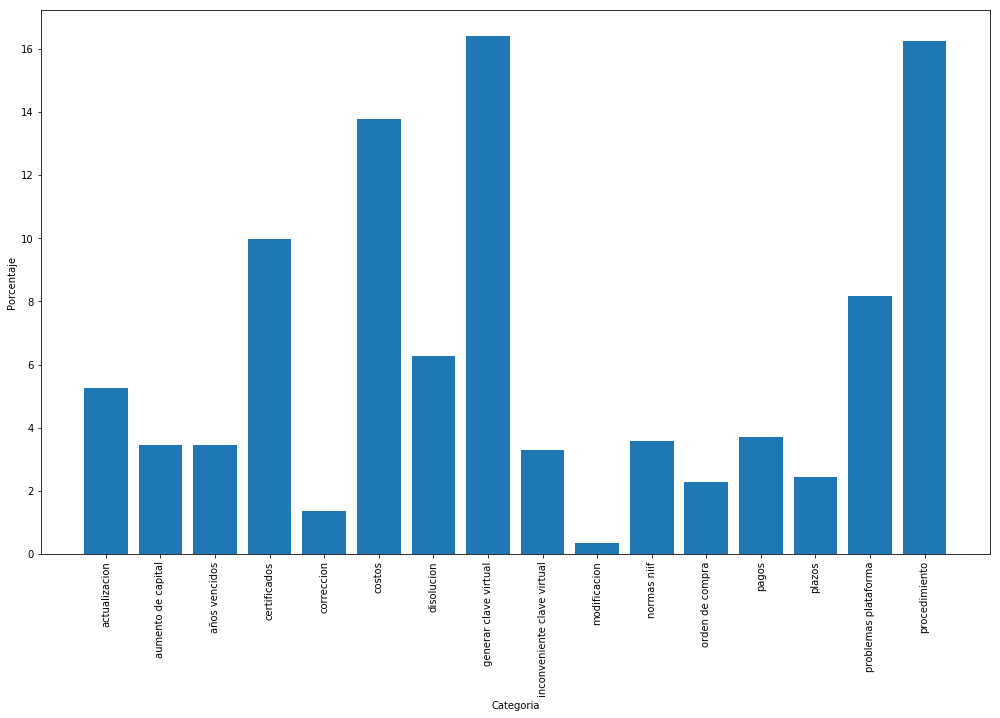

In [20]:
#dataframe
plt.figure(figsize=(17,10))

bins = np.linspace(0, 400, 20)
#plt.hist(dataframe_chatccb_size, bins, normed=False, histtype='stepfilled', color="r",  alpha=1, label="label")
plt.bar(np.arange(len(dataframe_chatccb_size_div)), dataframe_chatccb_size_div)


#plt.title("Percentage_Label")
plt.ylabel("Porcentaje")#
plt.xlabel("Categoria")
plt.xticks(np.arange(len(dataframe_chatccb_size_div)), labels, rotation=90)
plt.savefig("Percentage_Label.jpg", bbox_inches='tight')
#plt.legend()
plt.show()
#plt.savefig("Percentage_Label.png")

In [21]:
#labels
len(dataframe_chatccb_size_div)
fracs

[554, 1484]

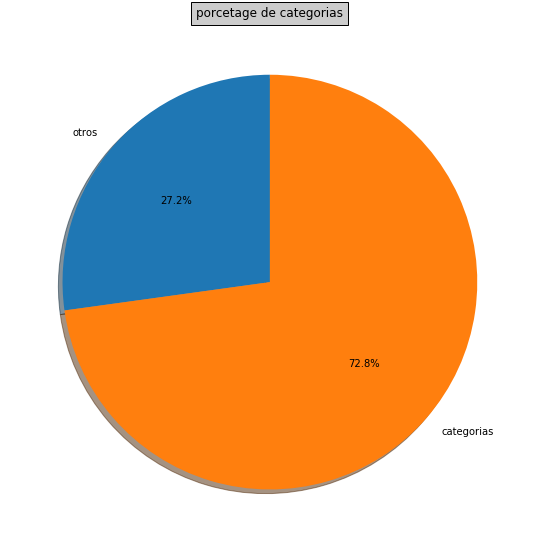

In [22]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(9,9))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels1 = 'otros', 'categorias'
fracs
explode= (0, 0)

pie(fracs, explode=explode, labels=labels1,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('porcetage de categorias', bbox={'facecolor':'0.8', 'pad':5})

show()

In [23]:
dataframe_chatccb_size_div

[5.263157894736842,
 3.4412955465587043,
 3.4412955465587043,
 9.986504723346828,
 1.349527665317139,
 13.765182186234817,
 6.275303643724696,
 16.39676113360324,
 3.3063427800269904,
 0.33738191632928477,
 3.576248313090418,
 2.294197031039136,
 3.711201079622132,
 2.42914979757085,
 8.164642375168691,
 16.261808367071524]